# Ann Arbor Temperature Trends (2005 - 2015)

The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The aim of this project is to:

1. Create a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day are shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Manage leap days (i.e. February 29th).

The data given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
from matplotlib import dates, pyplot
import numpy as np
from datetime import datetime as dt
#import data
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#create dataframe
df = pd.DataFrame(data)
df.drop('ID', axis=1, inplace=True)
#divide max and min temps into two dataframes
df_min = df[df['Element'] == 'TMIN'].copy()
df_max = df[df['Element'] == 'TMAX'].copy()
#create dataframes containing only 2015 data
df_min_2015 = df_min[df_min['Date'] >= '2015'].copy()
df_max_2015 = df_max[df_max['Date'] >= '2015'].copy()
#remove 2015 data from the main min/max dataframes as this is now in the two frames above
df_min = df_min[df_min['Date'] < '2015']
df_max = df_max[df_max['Date'] < '2015']
#sort values by date and reset the indexes
df_min.sort_values(by=['Date'], inplace=True)
df_max.sort_values(by=['Date'], inplace=True)
df_min.reset_index(drop=True, inplace=True)
df_max.reset_index(drop=True, inplace=True)
df_min_2015.sort_values(by=['Date'], inplace=True)
df_max_2015.sort_values(by=['Date'], inplace=True)
df_min_2015.reset_index(drop=True, inplace=True)
df_max_2015.reset_index(drop=True, inplace=True)
#convert the dates from strings into DateTime
df_min['Date'] = pd.to_datetime(df_min['Date']) 
df_max['Date'] = pd.to_datetime(df_max['Date']) 
df_min_2015['Date'] = pd.to_datetime(df_min_2015['Date']) 
df_max_2015['Date'] = pd.to_datetime(df_max_2015['Date']) 
#remove the year from each date, leaving only mm-dd
df_min['Date'] = df_min['Date'].dt.strftime('%j')
df_max['Date'] = df_max['Date'].dt.strftime('%j')
df_min_2015['Date'] = df_min_2015['Date'].dt.strftime('%j')
df_max_2015['Date'] = df_max_2015['Date'].dt.strftime('%j')
#remove leap year dates
df_min = df_min[df_min['Date'] != '060']
df_max = df_max[df_max['Date'] != '060']
df_min.drop('Element', axis=1, inplace=True)
df_max.drop('Element', axis=1, inplace=True)
df_min_2015.drop('Element', axis=1, inplace=True)
df_max_2015.drop('Element', axis=1, inplace=True)

In [3]:
#find min and max values for each day over the varying years
df_min = df_min.groupby(by=['Date']).min()
df_max = df_max.groupby(by=['Date']).max()
df_min_2015 = df_min_2015.groupby(by=['Date']).min()
df_max_2015 = df_max_2015.groupby(by=['Date']).max()
#Set new index
df_min.reset_index(inplace=True)
df_max.reset_index(inplace=True)
df_min_2015.reset_index(inplace=True)
df_max_2015.reset_index(inplace=True)

In [4]:
#Convert temperatures to degrees C
df_min['Data_Value'] = df_min['Data_Value'] / 10
df_max['Data_Value'] = df_max['Data_Value'] / 10
df_min_2015['Data_Value'] = df_min_2015['Data_Value'] / 10
df_max_2015['Data_Value'] = df_max_2015['Data_Value'] / 10

In [5]:
#defines the values from 2015 that exceed the daily maximums from 2004-2015
max = df_max_2015[df_max_2015['Data_Value'] > df_max['Data_Value']]
min = df_min_2015[df_min_2015['Data_Value'] < df_min['Data_Value']]

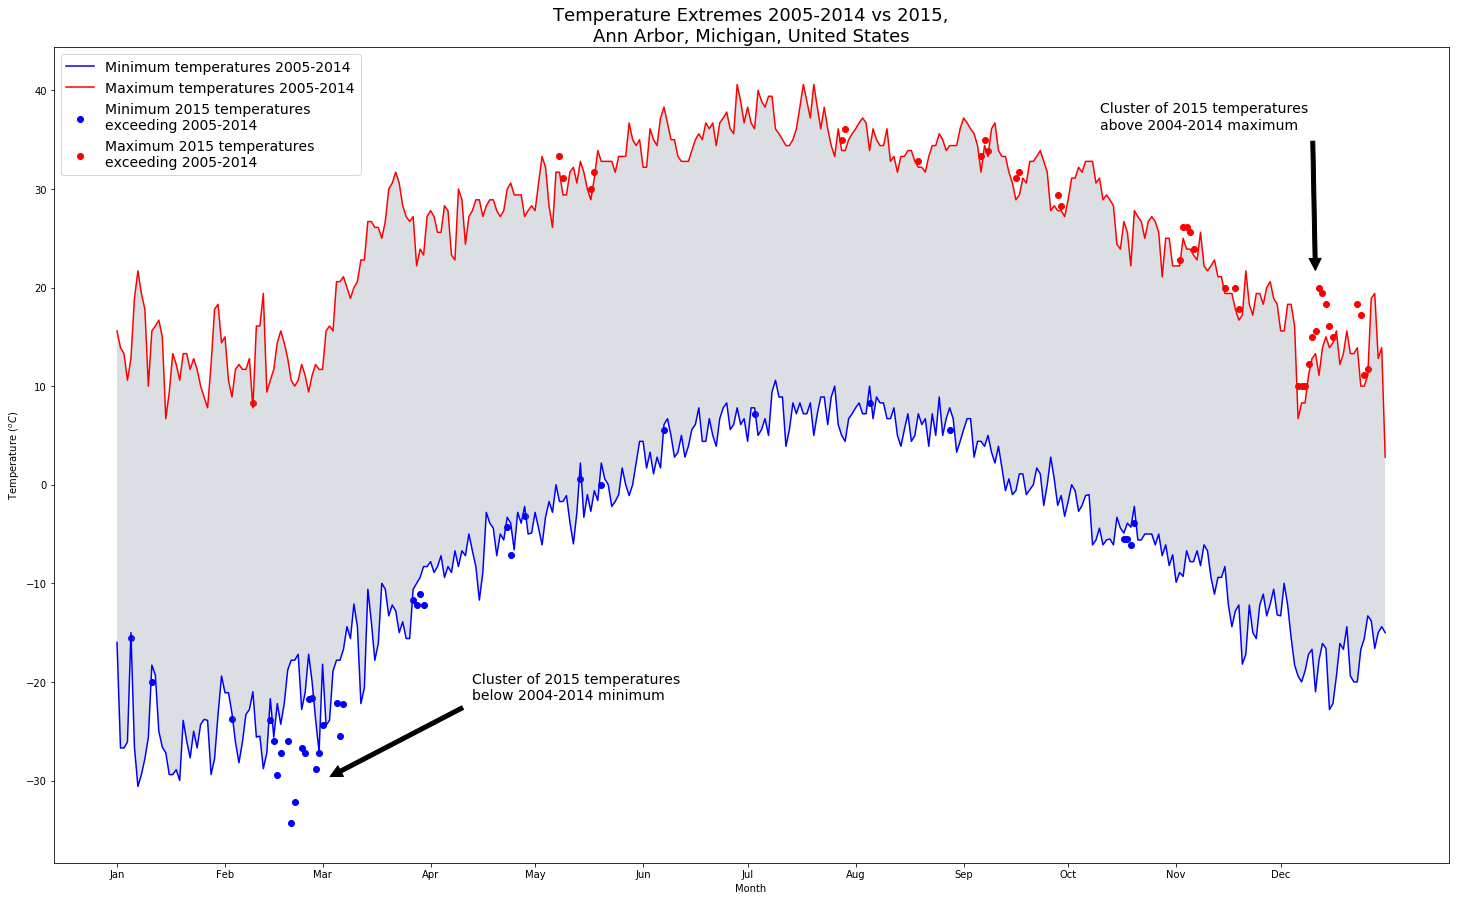

In [6]:
from matplotlib.pyplot import figure
#set figure size
fig, ax = plt.subplots(figsize=(25, 15))
ax = plt.gca()
#sets font sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 40
#assignes font sizes to labels and ticks
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
#set range of dates per day of the year
observation_dates = list(range(1,366))
#create the line plots of 2004-2015 data
ax.plot(observation_dates, df_min['Data_Value'], linestyle = '-', color = 'b', label = 'Minimum temperatures 2005-2014')
ax.plot(observation_dates, df_max['Data_Value'], linestyle = '-', color = 'r', label = 'Maximum temperatures 2005-2014')
#create scatter plot of 2015 data
ax.scatter(min['Date'], min['Data_Value'], color = 'b', label = 'Minimum 2015 temperatures \nexceeding 2005-2014')
ax.scatter(max['Date'], max['Data_Value'], color = 'r', label = 'Maximum 2015 temperatures \nexceeding 2005-2014')
#set the fill between the two line plots
plt.gca().fill_between(observation_dates, 
                       df_min['Data_Value'], df_max['Data_Value'], 
                       facecolor='slategrey', 
                       alpha=0.25)
#format labels for axes. legend, and title
ax.set_xlabel('Month')
ax.set_ylabel('Temperature ($^oC$)')
ax.set_title('Temperature Extremes 2005-2014 vs 2015,\nAnn Arbor, Michigan, United States')
ax.legend(loc='upper left')
#annotations on the plot
ax.annotate('Cluster of 2015 temperatures \nbelow 2004-2014 minimum', xy=(60, -30),  xycoords='data',
            xytext=(0.3, 0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Cluster of 2015 temperatures \nabove 2004-2014 maximum', xy=(345, 21),  xycoords='data',
            xytext=(0.75, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05))
#set x-axis to show months of the year
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
DayOfMonth=[1,32,60,91,121,152,182,213,244,274,305,335]
plt.xticks(DayOfMonth)
plt.xticks(DayOfMonth,month)
#show and then save the plot
plt.show()
fig.savefig('Assignment2.png', dpi=100)